#  First code analysis

In [ ]:
# Command launched
# pylint src --output-format=json:reports/linters/0.1-report-pylint.json,colorized

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 18, 8
import random

my_red_palette = ['#9d0208', '#ff1100', '#e85d04', '#faa307', '#ffcd34', '#fff3b0']
my_pastel_palette = ['#b9fbc0', '#98f5e1', '#8eecf5', '#90dbf4', '#a3c4f3', '#cfbaf0', '#f1c0e8', '#ffcfd2', '#fde4cf', '#fbf8cc']

In [15]:
df1 = pd.read_json('0.1-report-pylint.json')
df1.sample(5, random_state=3)

,type,module,obj,line,column,endLine,endColumn,path,symbol,message,message-id
323,convention,src.data.extract_data,,13,0,NaN,NaN,src/data/extract_data.py,trailing-whitespace,Trailing whitespace,C0303
74,refactor,src.utils,applyRandomDistorsion,49,29,49.0,61.0,src/utils.py,unnecessary-comprehension,"Unnecessary use of a comprehension, use list(r...",R1721
329,convention,src.data.extract_data,extract,12,0,12.0,11.0,src/data/extract_data.py,missing-function-docstring,Missing function or method docstring,C0116
15,warning,src.utils,,30,0,NaN,NaN,src/utils.py,bad-indentation,"Bad indentation. Found 2 spaces, expected 8",W0311
267,warning,src.models.model,,80,0,NaN,NaN,src/models/model.py,bad-indentation,"Bad indentation. Found 2 spaces, expected 8",W0311


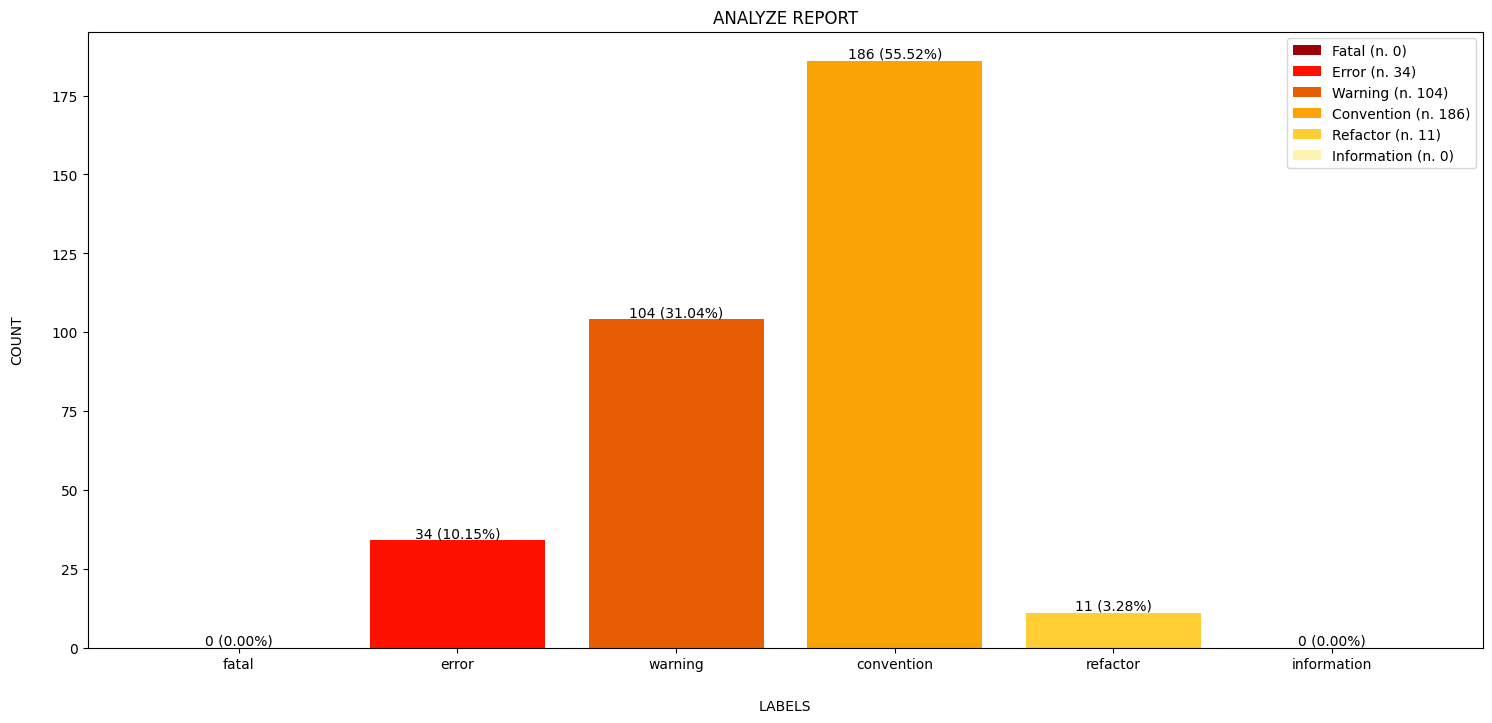

In [57]:
count = df1.type.value_counts()
missing = pd.Series([0, 0], index=['fatal', 'information'])
full_count = count.add(missing, fill_value=0)
ordered_by_severity = count.reindex(index = ['fatal','error','warning','convention','refactor','information'], fill_value=0)
bar_labels = [ordered_by_severity.index[i].capitalize()+' (n. ' + str(ordered_by_severity[i]) + ')' for i in range(len(ordered_by_severity.index))]
bars = plt.bar(ordered_by_severity.index, height=ordered_by_severity, label=bar_labels, color=my_red_palette)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(df1)*100:.2f}%)', ha='center', va='bottom')

plt.xlabel('LABELS', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('ANALYZE REPORT')
plt.legend()
plt.show()

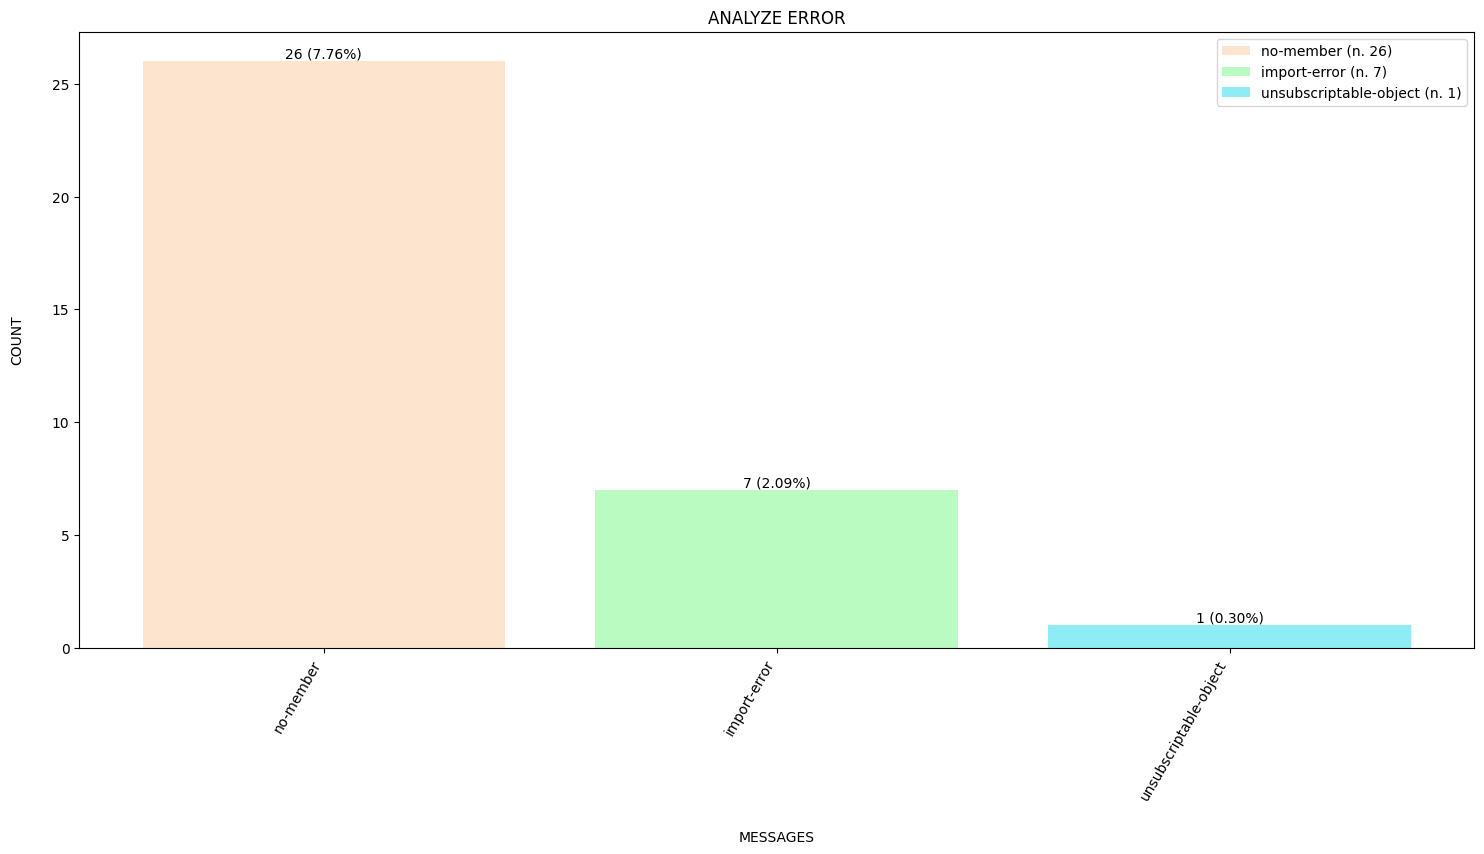

In [58]:
label = 'error'
df_by_label = df1.loc[df1['type'] == label]
mgs = df_by_label.symbol.value_counts()
bar_labels = [mgs.index[i]+' (n. ' + str(mgs[i]) + ')' for i in range(len(mgs.index))]
random.shuffle(my_pastel_palette)
bars = plt.bar(mgs.index, height=mgs, label=bar_labels, color=my_pastel_palette)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(df_by_label)*100:.2f}%)', ha='center', va='bottom')

plt.xlabel('MESSAGES', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('ANALYZE '+label.upper())
plt.xticks(rotation = 60, ha="right")
plt.legend()
plt.show()

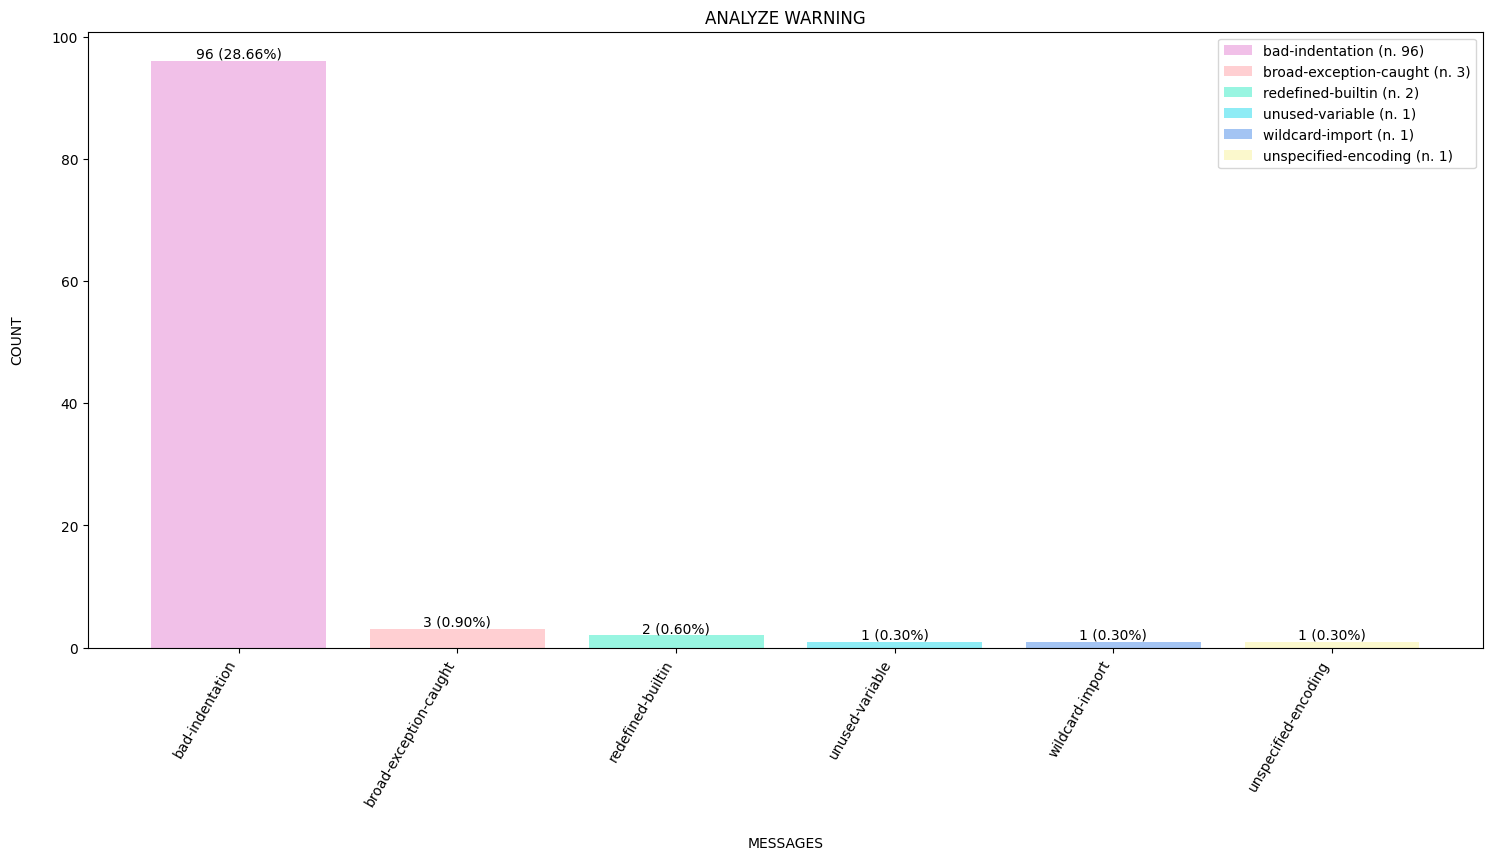

In [59]:
label = 'warning'
df_by_label = df1.loc[df1['type'] == label]
mgs = df_by_label.symbol.value_counts()
bar_labels = [mgs.index[i]+' (n. ' + str(mgs[i]) + ')' for i in range(len(mgs.index))]
random.shuffle(my_pastel_palette)
bars = plt.bar(mgs.index, height=mgs, label=bar_labels, color=my_pastel_palette)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(df_by_label)*100:.2f}%)', ha='center', va='bottom')

plt.xlabel('MESSAGES', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('ANALYZE '+label.upper())
plt.xticks(rotation = 60, ha="right")
plt.legend()
plt.show()

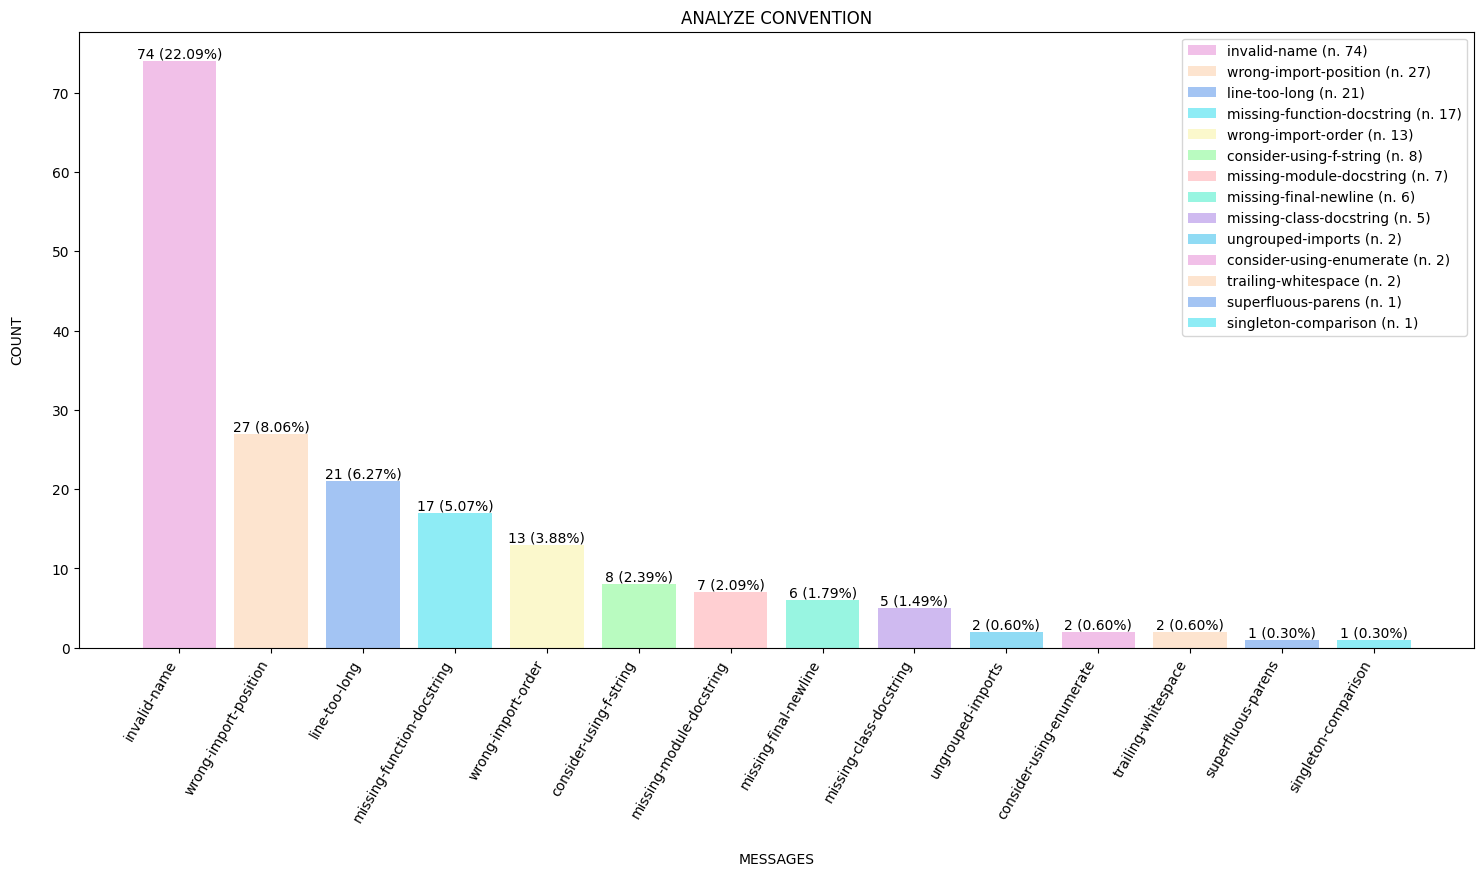

In [60]:
label = 'convention'
df_by_label = df1.loc[df1['type'] == label]
mgs = df_by_label.symbol.value_counts()
bar_labels = [mgs.index[i]+' (n. ' + str(mgs[i]) + ')' for i in range(len(mgs.index))]
random.shuffle(my_pastel_palette)
bars = plt.bar(mgs.index, height=mgs, label=bar_labels, color=my_pastel_palette)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(df_by_label)*100:.2f}%)', ha='center', va='bottom')

plt.xlabel('MESSAGES', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('ANALYZE '+label.upper())
plt.xticks(rotation = 60, ha="right")
plt.legend()
plt.show()

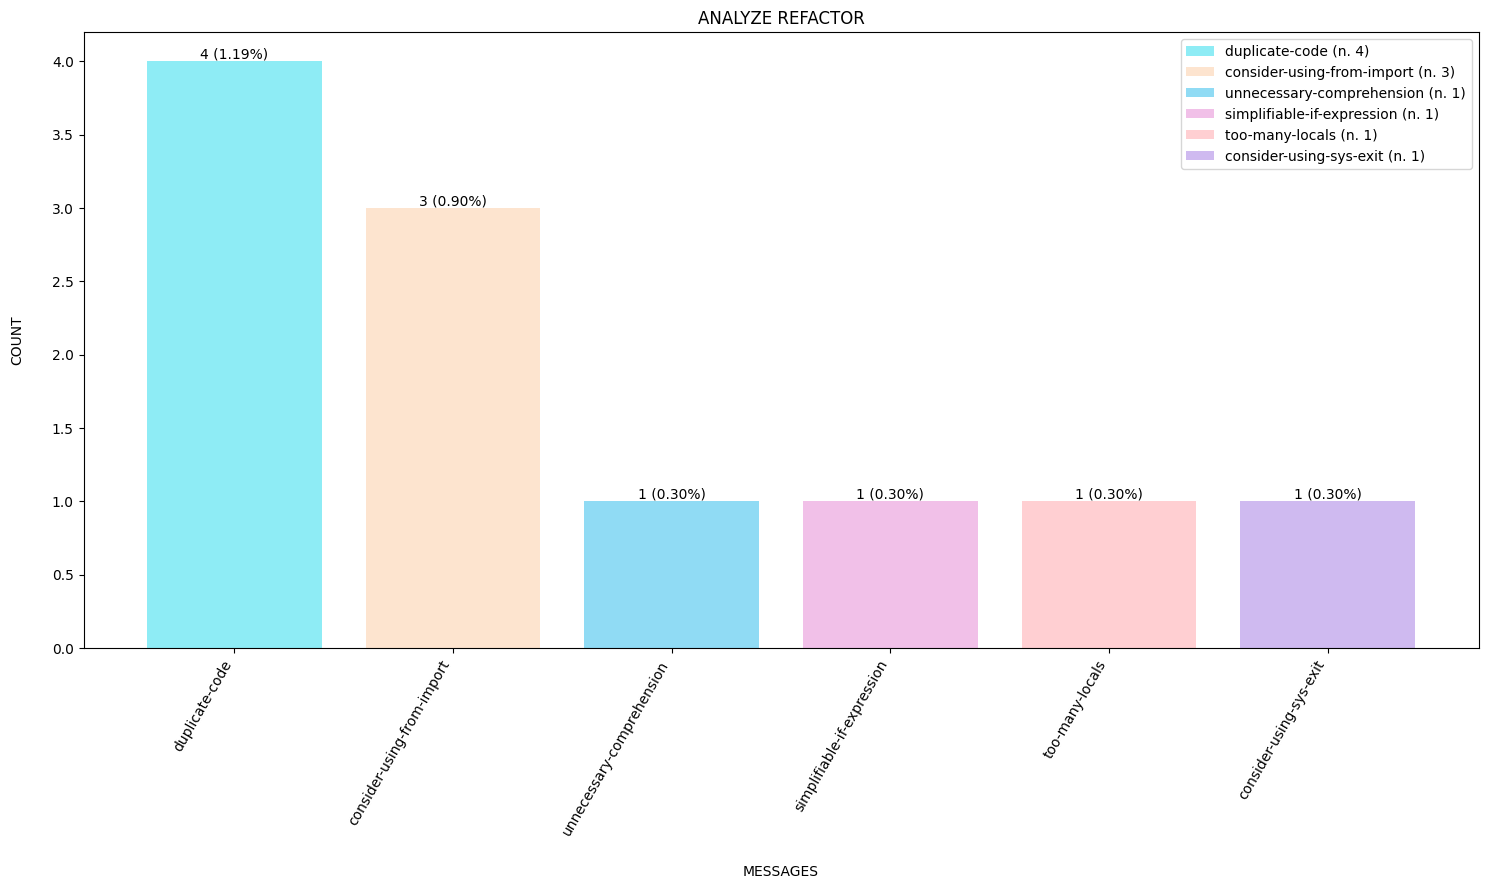

In [62]:
label = 'refactor'
df_by_label = df1.loc[df1['type'] == label]
mgs = df_by_label.symbol.value_counts()
bar_labels = [mgs.index[i]+' (n. ' + str(mgs[i]) + ')' for i in range(len(mgs.index))]
random.shuffle(my_pastel_palette)
bars = plt.bar(mgs.index, height=mgs, label=bar_labels, color=my_pastel_palette)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(df_by_label)*100:.2f}%)', ha='center', va='bottom')

plt.xlabel('MESSAGES', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('ANALYZE '+label.upper())
plt.xticks(rotation = 60, ha="right")
plt.legend()
plt.show()